In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from  tensorflow.keras.datasets import mnist

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [4]:
data = mnist.load_data(path='mnist.npz')

In [5]:
x_data = data[0][0][:,:,:,np.newaxis]
y_data = data[0][1]
x_test = data[1][0][:,:,:,np.newaxis]
y_test = data[1][1]

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.33, random_state=42, stratify=y_data)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((40200, 28, 28, 1),
 (40200, 10),
 (19800, 28, 28, 1),
 (19800, 10),
 (10000, 28, 28, 1),
 (10000, 10))

In [7]:
y_list = np.unique(data[1][1])
y_list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
input_shape = x_test[0].shape
output_size = y_list.shape[0]

In [9]:
def build_2d_cnn_custom_ch_32_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=3, filters=32*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=2, strides=(2,2), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.75)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [10]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)    

Train on 40200 samples, validate on 19800 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
39872/40200 [============================>.] - ETA: 0s - loss: 9.3246 - acc: 0.3868
Epoch 00001: val_loss improved from inf to 3.39675, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv_checkpoint/001-3.3967.hdf5
40200/40200 [==============================] - 5s 129us/sample - loss: 9.2950 - acc: 0.3886 - val_loss: 3.3967 - val_acc: 0.7620
Epoch 2/500
39552/40200 [============================>.] - ETA: 0s - loss: 4.6261 - acc: 0.6814
Epoch 00002: val_loss improved from 3.39675 to 1.87175, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv_checkpoint/002-1.8717.hdf5
40200/40200 [==============================] - 4s 94us/sample - loss: 4.6023 - acc: 0.6828 - val_loss: 1.8717 - val_acc: 0.8559
Epoch 3/500
40128/40200 [============================>.] - ETA: 0s - loss: 2.7850 - acc: 0.7963
Epoch 00003: val_loss improved from 1.87175 to 

Epoch 22/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.2269 - acc: 0.9478
Epoch 00022: val_loss improved from 0.11132 to 0.10095, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv_checkpoint/022-0.1009.hdf5
40200/40200 [==============================] - 4s 94us/sample - loss: 0.2270 - acc: 0.9477 - val_loss: 0.1009 - val_acc: 0.9743
Epoch 23/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1968 - acc: 0.9492
Epoch 00023: val_loss improved from 0.10095 to 0.09270, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv_checkpoint/023-0.0927.hdf5
40200/40200 [==============================] - 4s 94us/sample - loss: 0.1975 - acc: 0.9490 - val_loss: 0.0927 - val_acc: 0.9750
Epoch 24/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1776 - acc: 0.9511
Epoch 00024: val_loss improved from 0.09270 to 0.08963, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv_checkpoin

Epoch 45/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0939 - acc: 0.9705
Epoch 00045: val_loss improved from 0.06541 to 0.06327, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv_checkpoint/045-0.0633.hdf5
40200/40200 [==============================] - 4s 96us/sample - loss: 0.0940 - acc: 0.9704 - val_loss: 0.0633 - val_acc: 0.9820
Epoch 46/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0901 - acc: 0.9722
Epoch 00046: val_loss did not improve from 0.06327
40200/40200 [==============================] - 3s 85us/sample - loss: 0.0909 - acc: 0.9722 - val_loss: 0.0636 - val_acc: 0.9815
Epoch 47/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0918 - acc: 0.9702
Epoch 00047: val_loss improved from 0.06327 to 0.06267, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv_checkpoint/047-0.0627.hdf5
40200/40200 [==============================] - 3s 86us/sample - loss: 0.0923 - acc: 0.97

Epoch 72/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0768 - acc: 0.9758
Epoch 00072: val_loss did not improve from 0.05862
40200/40200 [==============================] - 4s 97us/sample - loss: 0.0765 - acc: 0.9759 - val_loss: 0.0591 - val_acc: 0.9828
Epoch 73/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0769 - acc: 0.9750
Epoch 00073: val_loss did not improve from 0.05862
40200/40200 [==============================] - 4s 93us/sample - loss: 0.0768 - acc: 0.9750 - val_loss: 0.0592 - val_acc: 0.9828
Epoch 74/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9748
Epoch 00074: val_loss did not improve from 0.05862
40200/40200 [==============================] - 4s 94us/sample - loss: 0.0781 - acc: 0.9747 - val_loss: 0.0589 - val_acc: 0.9825
Epoch 75/500
39616/40200 [============================>.] - ETA: 0s - loss: 0.0790 - acc: 0.9742
Epoch 00075: val_loss did not improve from 0.05862
40200/40200 [===========

Epoch 101/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0708 - acc: 0.9775
Epoch 00101: val_loss did not improve from 0.05801
40200/40200 [==============================] - 4s 92us/sample - loss: 0.0706 - acc: 0.9775 - val_loss: 0.0595 - val_acc: 0.9836
Epoch 102/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0727 - acc: 0.9762
Epoch 00102: val_loss did not improve from 0.05801
40200/40200 [==============================] - 4s 91us/sample - loss: 0.0727 - acc: 0.9762 - val_loss: 0.0589 - val_acc: 0.9833
Epoch 103/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0692 - acc: 0.9768
Epoch 00103: val_loss did not improve from 0.05801
40200/40200 [==============================] - 4s 93us/sample - loss: 0.0691 - acc: 0.9768 - val_loss: 0.0582 - val_acc: 0.9838
Epoch 104/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0686 - acc: 0.9777
Epoch 00104: val_loss did not improve from 0.05801
40200/40200 [=======

39616/40200 [============================>.] - ETA: 0s - loss: 0.0659 - acc: 0.9784
Epoch 00159: val_loss did not improve from 0.05698
40200/40200 [==============================] - 4s 93us/sample - loss: 0.0656 - acc: 0.9785 - val_loss: 0.0584 - val_acc: 0.9836
Epoch 160/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0653 - acc: 0.9785
Epoch 00160: val_loss did not improve from 0.05698
40200/40200 [==============================] - 4s 93us/sample - loss: 0.0652 - acc: 0.9785 - val_loss: 0.0589 - val_acc: 0.9833
Epoch 161/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0636 - acc: 0.9787
Epoch 00161: val_loss did not improve from 0.05698
40200/40200 [==============================] - 4s 91us/sample - loss: 0.0636 - acc: 0.9788 - val_loss: 0.0588 - val_acc: 0.9830
Epoch 162/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9790
Epoch 00162: val_loss did not improve from 0.05698
40200/40200 [=====================

Epoch 189/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0624 - acc: 0.9796
Epoch 00189: val_loss did not improve from 0.05698
40200/40200 [==============================] - 4s 92us/sample - loss: 0.0629 - acc: 0.9795 - val_loss: 0.0591 - val_acc: 0.9842
Epoch 190/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0651 - acc: 0.9793
Epoch 00190: val_loss did not improve from 0.05698
40200/40200 [==============================] - 4s 93us/sample - loss: 0.0651 - acc: 0.9793 - val_loss: 0.0584 - val_acc: 0.9835
Epoch 191/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0620 - acc: 0.9799
Epoch 00191: val_loss did not improve from 0.05698
40200/40200 [==============================] - 4s 93us/sample - loss: 0.0620 - acc: 0.9799 - val_loss: 0.0596 - val_acc: 0.9831
Epoch 192/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0623 - acc: 0.9785
Epoch 00192: val_loss did not improve from 0.05698
40200/40200 [=======

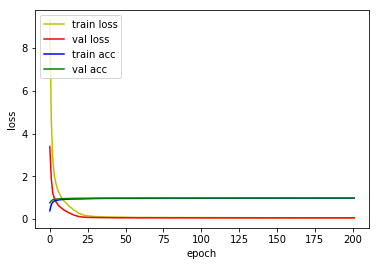

10000/10000 [==============================] - 1s 79us/sample - loss: 0.0591 - acc: 0.9839
Loss: 0.05906217606815044 Accuracy: 0.9839

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40192/40200 [============================>.] - ETA: 0s - loss: 11.5168 - acc: 0.2321
Epoch 00001: val_loss improved from inf to 3.17290, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpoint/001-3.1729.hdf5
40200/40200 [==============================] - 5s 128us/sample - loss: 11.5173 - acc: 0.2321 - val_loss: 3.1729 - val_acc: 0.6830
Epoch 2/500
40064/40200 [============================>.] - ETA: 0s - loss: 3.2643 - acc: 0.5336
Epoch 00002: val_loss improved from 3.17290 to 0.57545, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpoint/002-0.5755.hdf5
40200/40200 [==============================] - 4s 110us/sample - loss: 3.2574 - acc: 0.5339 - val_loss: 0.5755 - val_acc: 0.8344
Epoch 3/500
39936/40200 [============================

Epoch 22/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1584 - acc: 0.9511
Epoch 00022: val_loss improved from 0.06335 to 0.06179, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpoint/022-0.0618.hdf5
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1580 - acc: 0.9513 - val_loss: 0.0618 - val_acc: 0.9816
Epoch 23/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.1527 - acc: 0.9528
Epoch 00023: val_loss improved from 0.06179 to 0.05951, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpoint/023-0.0595.hdf5
40200/40200 [==============================] - 4s 109us/sample - loss: 0.1527 - acc: 0.9528 - val_loss: 0.0595 - val_acc: 0.9820
Epoch 24/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.1432 - acc: 0.9550
Epoch 00024: val_loss improved from 0.05951 to 0.05571, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpo

Epoch 46/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0923 - acc: 0.9704
Epoch 00046: val_loss did not improve from 0.04277
40200/40200 [==============================] - 4s 108us/sample - loss: 0.0924 - acc: 0.9704 - val_loss: 0.0431 - val_acc: 0.9878
Epoch 47/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0924 - acc: 0.9709
Epoch 00047: val_loss improved from 0.04277 to 0.04193, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpoint/047-0.0419.hdf5
40200/40200 [==============================] - 4s 109us/sample - loss: 0.0925 - acc: 0.9708 - val_loss: 0.0419 - val_acc: 0.9881
Epoch 48/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0943 - acc: 0.9704
Epoch 00048: val_loss did not improve from 0.04193
40200/40200 [==============================] - 4s 109us/sample - loss: 0.0942 - acc: 0.9704 - val_loss: 0.0426 - val_acc: 0.9879
Epoch 49/500
39936/40200 [============================>.] - ETA

Epoch 72/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0757 - acc: 0.9752
Epoch 00072: val_loss improved from 0.03965 to 0.03925, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpoint/072-0.0392.hdf5
40200/40200 [==============================] - 4s 109us/sample - loss: 0.0756 - acc: 0.9752 - val_loss: 0.0392 - val_acc: 0.9883
Epoch 73/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0758 - acc: 0.9765
Epoch 00073: val_loss did not improve from 0.03925
40200/40200 [==============================] - 4s 108us/sample - loss: 0.0759 - acc: 0.9764 - val_loss: 0.0396 - val_acc: 0.9883
Epoch 74/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0717 - acc: 0.9769
Epoch 00074: val_loss did not improve from 0.03925
40200/40200 [==============================] - 4s 108us/sample - loss: 0.0715 - acc: 0.9770 - val_loss: 0.0399 - val_acc: 0.9886
Epoch 75/500
39872/40200 [============================>.] - ETA

Epoch 127/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0620 - acc: 0.9807
Epoch 00127: val_loss did not improve from 0.03542
40200/40200 [==============================] - 4s 109us/sample - loss: 0.0619 - acc: 0.9806 - val_loss: 0.0354 - val_acc: 0.9894
Epoch 128/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0581 - acc: 0.9815
Epoch 00128: val_loss did not improve from 0.03542
40200/40200 [==============================] - 4s 109us/sample - loss: 0.0583 - acc: 0.9815 - val_loss: 0.0372 - val_acc: 0.9891
Epoch 129/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0598 - acc: 0.9813
Epoch 00129: val_loss did not improve from 0.03542
40200/40200 [==============================] - 4s 108us/sample - loss: 0.0598 - acc: 0.9814 - val_loss: 0.0359 - val_acc: 0.9896
Epoch 130/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0589 - acc: 0.9818
Epoch 00130: val_loss did not improve from 0.03542
40200/40200 [====

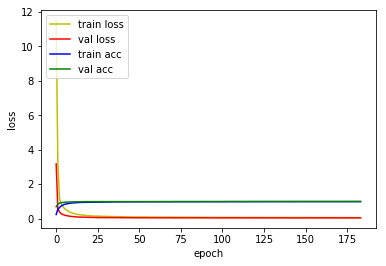

10000/10000 [==============================] - 1s 85us/sample - loss: 0.0298 - acc: 0.9901
Loss: 0.029803342605679062 Accuracy: 0.9901

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40192/40200 [============================>.] - ETA: 0s - loss: 6.7029 - acc: 0.3074
Epoch 00001: val_loss improved from inf to 0.68222, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/001-0.6822.hdf5
40200/40200 [==============================] - 6s 156us/sample - loss: 6.7019 - acc: 0.3074 - val_loss: 0.6822 - val_acc: 0.8174
Epoch 2/500
40064/40200 [============================>.] - ETA: 0s - loss: 1.1295 - acc: 0.6383
Epoch 00002: val_loss improved from 0.68222 to 0.35702, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/002-0.3570.hdf5
40200/40200 [==============================] - 5s 127us/sample - loss: 1.1290 - acc: 0.6384 - val_loss: 0.3570 - val_acc: 0.9013
Epoch 3/500
40128/40200 [============================>

Epoch 48/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0490 - acc: 0.9839
Epoch 00048: val_loss improved from 0.03498 to 0.03322, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/048-0.0332.hdf5
40200/40200 [==============================] - 5s 126us/sample - loss: 0.0489 - acc: 0.9840 - val_loss: 0.0332 - val_acc: 0.9905
Epoch 49/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0484 - acc: 0.9845
Epoch 00049: val_loss did not improve from 0.03322
40200/40200 [==============================] - 5s 123us/sample - loss: 0.0485 - acc: 0.9845 - val_loss: 0.0346 - val_acc: 0.9894
Epoch 50/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0462 - acc: 0.9847
Epoch 00050: val_loss did not improve from 0.03322
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0462 - acc: 0.9847 - val_loss: 0.0337 - val_acc: 0.9901
Epoch 51/500
39872/40200 [============================>.] - ETA

Epoch 75/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0359 - acc: 0.9884
Epoch 00075: val_loss did not improve from 0.03083
40200/40200 [==============================] - 5s 123us/sample - loss: 0.0357 - acc: 0.9884 - val_loss: 0.0326 - val_acc: 0.9907
Epoch 76/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0366 - acc: 0.9876
Epoch 00076: val_loss did not improve from 0.03083
40200/40200 [==============================] - 5s 123us/sample - loss: 0.0366 - acc: 0.9876 - val_loss: 0.0328 - val_acc: 0.9906
Epoch 77/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0354 - acc: 0.9880
Epoch 00077: val_loss did not improve from 0.03083
40200/40200 [==============================] - 5s 124us/sample - loss: 0.0354 - acc: 0.9880 - val_loss: 0.0328 - val_acc: 0.9903
Epoch 78/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0297 - acc: 0.9899
Epoch 00078: val_loss did not improve from 0.03083
40200/40200 [========

Epoch 104/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0262 - acc: 0.9913
Epoch 00104: val_loss did not improve from 0.03021
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0263 - acc: 0.9912 - val_loss: 0.0347 - val_acc: 0.9905
Epoch 105/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0256 - acc: 0.9913
Epoch 00105: val_loss did not improve from 0.03021
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0257 - acc: 0.9913 - val_loss: 0.0327 - val_acc: 0.9911
Epoch 106/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0267 - acc: 0.9907
Epoch 00106: val_loss did not improve from 0.03021
40200/40200 [==============================] - 5s 126us/sample - loss: 0.0266 - acc: 0.9908 - val_loss: 0.0343 - val_acc: 0.9908
Epoch 107/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0248 - acc: 0.9916
Epoch 00107: val_loss did not improve from 0.03021
40200/40200 [====

Epoch 163/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0176 - acc: 0.9944
Epoch 00163: val_loss did not improve from 0.02925
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0176 - acc: 0.9945 - val_loss: 0.0343 - val_acc: 0.9915
Epoch 164/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0193 - acc: 0.9937
Epoch 00164: val_loss did not improve from 0.02925
40200/40200 [==============================] - 5s 124us/sample - loss: 0.0193 - acc: 0.9937 - val_loss: 0.0342 - val_acc: 0.9915
Epoch 165/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0173 - acc: 0.9941
Epoch 00165: val_loss did not improve from 0.02925
40200/40200 [==============================] - 5s 124us/sample - loss: 0.0173 - acc: 0.9941 - val_loss: 0.0343 - val_acc: 0.9918
Epoch 166/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0174 - acc: 0.9940
Epoch 00166: val_loss did not improve from 0.02925
40200/40200 [====

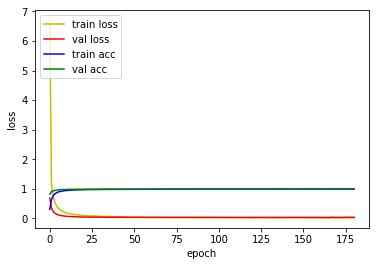

10000/10000 [==============================] - 1s 97us/sample - loss: 0.0235 - acc: 0.9934
Loss: 0.023460563211250975 Accuracy: 0.9934

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40192/40200 [============================>.] - ETA: 0s - loss: 4.7412 - acc: 0.3488
Epoch 00001: val_loss improved from inf to 0.70253, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/001-0.7025.hdf5
40200/40200 [==============================] - 7s 183us/sample - loss: 4.7408 - acc: 0.3488 - val_loss: 0.7025 - val_acc: 0.8403
Epoch 2/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.9745 - acc: 0.6793
Epoch 00002: val_loss improved from 0.70253 to 0.28725, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/002-0.2873.hdf5
40200/40200 [==============================] - 6s 142us/sample - loss: 0.9726 - acc: 0.6800 - val_loss: 0.2873 - val_acc: 0.9215
Epoch 3/500
40064/40200 [============================>

40192/40200 [============================>.] - ETA: 0s - loss: 0.0330 - acc: 0.9898
Epoch 00050: val_loss did not improve from 0.03379
40200/40200 [==============================] - 5s 135us/sample - loss: 0.0331 - acc: 0.9898 - val_loss: 0.0391 - val_acc: 0.9907
Epoch 51/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0343 - acc: 0.9886
Epoch 00051: val_loss did not improve from 0.03379
40200/40200 [==============================] - 5s 130us/sample - loss: 0.0343 - acc: 0.9887 - val_loss: 0.0387 - val_acc: 0.9906
Epoch 52/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0328 - acc: 0.9892
Epoch 00052: val_loss did not improve from 0.03379
40200/40200 [==============================] - 6s 139us/sample - loss: 0.0327 - acc: 0.9893 - val_loss: 0.0393 - val_acc: 0.9901
Epoch 53/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0336 - acc: 0.9897
Epoch 00053: val_loss did not improve from 0.03379
40200/40200 [=====================

Epoch 80/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0189 - acc: 0.9936
Epoch 00080: val_loss did not improve from 0.03379
40200/40200 [==============================] - 6s 140us/sample - loss: 0.0189 - acc: 0.9936 - val_loss: 0.0425 - val_acc: 0.9907
Epoch 81/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0195 - acc: 0.9934
Epoch 00081: val_loss did not improve from 0.03379
40200/40200 [==============================] - 6s 140us/sample - loss: 0.0195 - acc: 0.9934 - val_loss: 0.0410 - val_acc: 0.9914
Epoch 82/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0190 - acc: 0.9938
Epoch 00082: val_loss did not improve from 0.03379
40200/40200 [==============================] - 6s 138us/sample - loss: 0.0190 - acc: 0.9938 - val_loss: 0.0422 - val_acc: 0.9907
Epoch 83/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0186 - acc: 0.9935
Epoch 00083: val_loss did not improve from 0.03379
40200/40200 [========

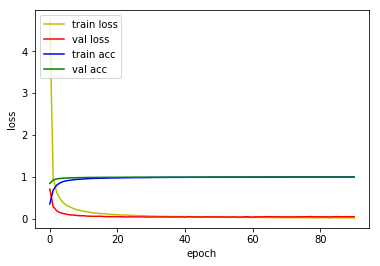

10000/10000 [==============================] - 1s 109us/sample - loss: 0.0319 - acc: 0.9900
Loss: 0.031944163388975814 Accuracy: 0.99

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
39936/40200 [============================>.] - ETA: 0s - loss: 1.9506 - acc: 0.5231
Epoch 00001: val_loss improved from inf to 0.28376, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_5_conv_checkpoint/001-0.2838.hdf5
40200/40200 [==============================] - 8s 200us/sample - loss: 1.9416 - acc: 0.5249 - val_loss: 0.2838 - val_acc: 0.9233
Epoch 2/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.4473 - acc: 0.8612
Epoch 00002: val_loss improved from 0.28376 to 0.14248, saving model to model/checkpoint/vis_2D_CNN_custom_ch_32_DO_075_DO_5_conv_checkpoint/002-0.1425.hdf5
40200/40200 [==============================] - 6s 154us/sample - loss: 0.4473 - acc: 0.8612 - val_loss: 0.1425 - val_acc: 0.9576
Epoch 3/500
39872/40200 [============================>.

Epoch 25/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0246 - acc: 0.9923
Epoch 00025: val_loss did not improve from 0.04469
40200/40200 [==============================] - 6s 155us/sample - loss: 0.0246 - acc: 0.9923 - val_loss: 0.0529 - val_acc: 0.9890
Epoch 26/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0198 - acc: 0.9941
Epoch 00026: val_loss did not improve from 0.04469
40200/40200 [==============================] - 6s 155us/sample - loss: 0.0198 - acc: 0.9941 - val_loss: 0.0506 - val_acc: 0.9897
Epoch 27/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0177 - acc: 0.9948
Epoch 00027: val_loss did not improve from 0.04469
40200/40200 [==============================] - 6s 153us/sample - loss: 0.0176 - acc: 0.9948 - val_loss: 0.0534 - val_acc: 0.9890
Epoch 28/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0197 - acc: 0.9945
Epoch 00028: val_loss did not improve from 0.04469
40200/40200 [========

Epoch 55/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.9979
Epoch 00055: val_loss did not improve from 0.04469
40200/40200 [==============================] - 6s 145us/sample - loss: 0.0072 - acc: 0.9979 - val_loss: 0.0703 - val_acc: 0.9904
Epoch 56/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0102 - acc: 0.9970
Epoch 00056: val_loss did not improve from 0.04469
40200/40200 [==============================] - 6s 150us/sample - loss: 0.0101 - acc: 0.9970 - val_loss: 0.0588 - val_acc: 0.9907
Epoch 57/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.9983
Epoch 00057: val_loss did not improve from 0.04469
40200/40200 [==============================] - 6s 157us/sample - loss: 0.0064 - acc: 0.9982 - val_loss: 0.0612 - val_acc: 0.9909
Epoch 58/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0046 - acc: 0.9986
Epoch 00058: val_loss did not improve from 0.04469
40200/40200 [========

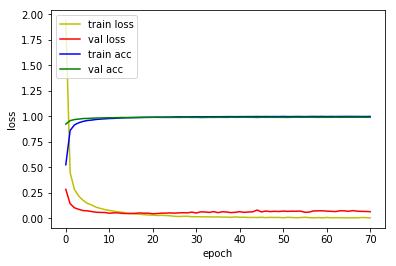

10000/10000 [==============================] - 1s 119us/sample - loss: 0.0372 - acc: 0.9904
Loss: 0.03720244868916198 Accuracy: 0.9904



In [11]:
for i in range(1, 6):
    base = 'vis_2D_CNN_custom_ch_32_DO_075_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [12]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_2D_CNN_custom_ch_32_DO_075_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(1, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)             

10000/10000 [==============================] - 1s 120us/sample - loss: 0.0372 - acc: 0.9904
Loss: 0.03720244868916198 Accuracy: 0.9904


In [13]:
for i in range(1, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_2D_CNN_custom_ch_32_DO_075_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)             

10000/10000 [==============================] - 1s 146us/sample - loss: 0.0602 - acc: 0.9910
Loss: 0.060186876521909495 Accuracy: 0.991


In [9]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_2D_CNN_custom_ch_32_DO_075_DO'

i = 3
model_name = base+'_{}_conv'.format(i)
print()
print(model_name, 'Model')
model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
model_filename = model_path + sorted(os.listdir(model_path))[-1]

model = load_model(model_filename)
model.summary()

[loss, accuracy] = model.evaluate(x_test, y_test)
print('Loss:', loss, 'Accuracy:', accuracy)

#         del(model)


vis_2D_CNN_custom_ch_32_DO_075_DO_3_conv Model
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        92

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
len(y_list)

10

Confusion Matrix
[[ 975    0    1    0    0    0    2    1    1    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    0 1028    0    1    0    0    1    0    1]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    0    0  975    0    0    0    1    6]
 [   1    0    0    3    0  887    1    0    0    0]
 [   4    1    0    0    2    1  946    0    4    0]
 [   0    3    4    0    0    0    0 1019    1    1]
 [   0    0    0    1    1    0    0    0  969    3]
 [   0    0    1    0    5    4    0    4    1  994]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       

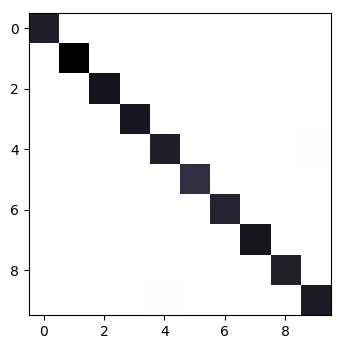

In [20]:
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
y_real = np.argmax(y_test, axis=1)
confusion_mat = confusion_matrix(y_real, y_pred)
print('Confusion Matrix')
print(confusion_mat)
print()

print('Classification Report')
print(classification_report(y_real, y_pred))
print()

# labels = y_table.T[0]
plt.figure(figsize=(4,4), dpi=100)
# plt.xticks(y_list, labels)
# plt.yticks(y_list, labels)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.bone_r)